In [1]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.tree import DecisionTreeClassifier, export_text

In [2]:
# Dataset Play Golf
data = {
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df

,Outlook,Temp,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [3]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts)) * log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

def info_gain(data, split_attribute_name, target_name="PlayGolf"):
    # Total entropy sebelum split
    total_entropy = entropy(data[target_name])
    
    # Nilai unik dari atribut
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    
    # Entropy rata-rata setelah split
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    # Information Gain
    information_gain = total_entropy - weighted_entropy
    return information_gain


In [4]:
print("Entropy (PlayGolf):", round(entropy(df["PlayGolf"]), 4))

for col in df.columns[:-1]:
    print(f"Information Gain ({col}):", round(info_gain(df, col), 4))

Entropy (PlayGolf): 0.9852
Information Gain (Outlook): 0.3806
Information Gain (Temp): 0.0391
Information Gain (Humidity): 0.0611
Information Gain (Windy): 0.1281


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode data ke numerik
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Pisahkan fitur dan target
X = df_encoded.drop(columns=['PlayGolf'])
y = df_encoded['PlayGolf']

# Buat dan latih Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Cetak struktur pohon
r = export_text(clf, feature_names=list(X.columns))
print(r)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Windy <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Humidity <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 1
|   |--- Windy >  0.50
|   |   |--- class: 0



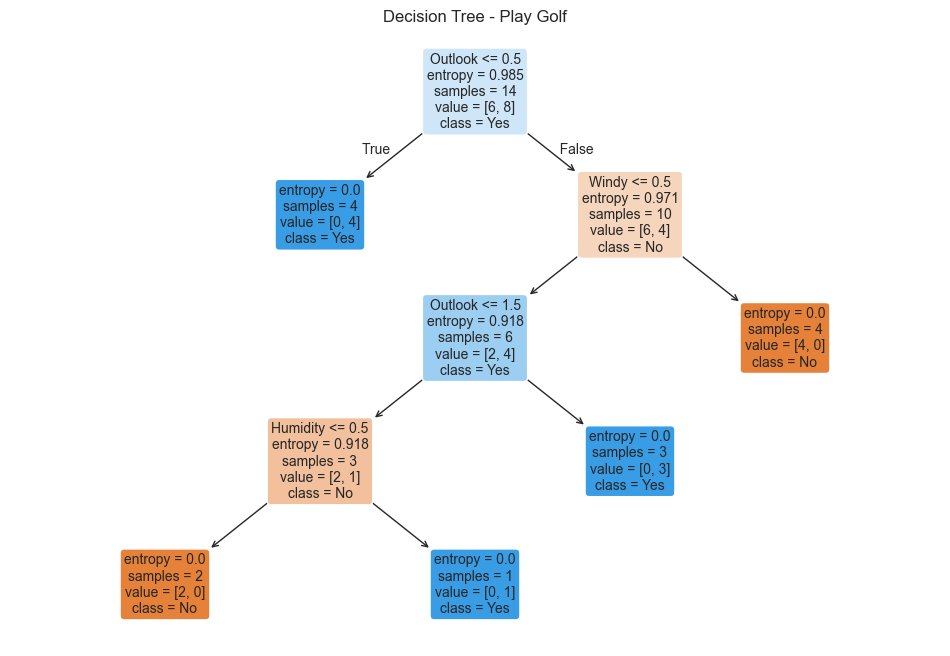

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=list(X.columns),
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree - Play Golf")
plt.show()